<font size="1"> *This notebook is best viewed in jupyter lab/notebook. You may also choose to use Google Colab but some parts of the images/colouring will not be rendered properly.</font> 

<div class="alert alert-block alert-warning">

# <p style="text-align: center;">Lab 2 (Weeks 3,4): Model training with Linear Regression and Logistic Regression</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" width="200" height="200" />

<!-- ![linear-vs-logistic-regression--medium](https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg) -->

Welcome to your second lab! This notebook contains all the code and comments that you will need to submit. Labs run over two weeks and the places where you need to edit are highlighted in red. Please note that the colour highlighting might not work across all IDEs, so make sure you check and run all cells! </br>

This Lab has three tasks. The first two tasks test your basic knowledge regarding the linear and logistic regression and their applcations. In the last task, you will analyse the results.
- <b>Task 1:</b> Simple linear regression
- <b>Task 2:</b> Logistic regression and gradient descent
- <b>Task 3:</b> Analysing convergence and accuracy
    
Each sub task will contain code to complete, and/or a worded question, so ensure you complete everything before submitting.

Feel free to add in your own markdown for additional comments, and also directly comment your code.

__Submission details:__
- __Make sure you have run all your cells from top to bottom (you can click _Kernel_ and _Restart Kernel and Run All Cells_).__ </br>
- __Submit the Jupyter Notebook (_Lab_2_student.ipynb_).__
- __Outputs must be visible upon submission. We will also be re-running your code__

<b>Enter you credentials below</b>

- <b>Student Name:</b> Alexander Li
- <b>Student ID:</b> 30630711

<div class="alert alert-block alert-danger">

## Table of Contents

* [Task 1: Simple linear regression](#simple-linear-regression)    
    * [1.1 Simple linear regression formulation](#lr-formulation)
    * [1.2 Test and visualise the linear regression](#test-lr)
    
    
* [Task 2: Logistic Regression and Gradient Descent](#logistic-gd)
    * [2.1 The sigmoid function](#sigmoid)
    * [2.2 Predicting class probabilities via logistic regression](#predict)
    * [2.3 Training a model via Gradient Descent](#train)
    * [2.4 Evaluating the trained model](#evaluate)
    

* [Task 3: Analysing convergence and accuracy](#analyse-convergence-and-accuracy)

In [2]:
## Libraries, you do not need to import any additional libraries for this lab

import numpy as np ## Numpy is the fundamental building block of understanding tensor (matrices) within Python
import matplotlib.pyplot as plt ## Matplotlib.pyplot is the graphing library that we will be using throughout the semester
import random ## Useful for sampling

import os ## Useful for running command line within python
from IPython.display import Image ## For markdown purposes

<div class="alert alert-block alert-warning">

# Before you begin

We have provided some numerical answers for you to aim for. To replicate these results, do not change any of the codes that are labelled "Do not change".

Throughout this lab, there will be code and written answers that you need to fill in / complete. The comments in the code snippet and markdown text will guide you on what you need to do.


<div class="alert alert-block alert-info">

# Task 1 - Simple linear regression <a class="anchor" id="simple-linear-regression"></a>

In this section, you will be writing the first parts of your code that is essential to predict the outcome of a linear regression problem. </br>
In detail, you are going to
- 1.1 Implement a simple linear regression function
- 1.2 Write code to visualise the line of regression using the trained linear regression model

<div class="alert alert-block alert-info">
    
## Learning Objective 

This task aims to understand and implement simple linear regression using the Least Squares Regression method to find the best line fit for given samples and visually analyze its performance. By the end of this task, you will be able to:
1. Formulate a simple linear regression equation $y = wx + b$.
2. Implement the Least Squares Regression method to find the estimated slope $\hat{m}$ and intercept $\hat{b}$ of the regression line, minimizing the square distances from each sample to the line.
3. Apply the developed simple linear regression function to samples of different distributions.
4. Visualize and analyze the performance of the linear regression model on the given samples to understand how well it fits the data.


<div class="alert alert-block alert-info">

# Linear Regression - A quick recap

Linear regression analysis is used to predict the value of a (dependent) variable based on the value of another (independent) variable assuming the there is a linear relationship between the two. Simply speaking, linear regression aims to find the best line fit for the given data. (See figure below)

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png" width="400"/>

<div class="alert alert-block alert-info">

## 1.1 Simple linear regression formulation <a class="anchor" id="lr-formulation"></a>

Let's consider a simple linear regression problem with one independent variable $x$ and one dependent variable $y$. The simple linear regression equation we will use is written below.

$$y=wx+b$$

We are going to use the **Least Squares Regression** to solve the problem. For a given set of data $(X,Y)$, where $X = \{x_1, x_2, ... x_n\}$ and $Y = \{y_1, y_2, ... y_n\}$, the equations are given:

To estimate the slope $w$ of the regression line:

$$\hat{w}=\frac{\sum^{n}_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum^{n}_{i=1}(x_i-\bar{x})^{2}}$$

To estimate the intercept $b$ of the regression line:

$$\hat{b}=\bar{y}-\hat{w}\bar{x}$$

Here, $\bar{x}$ and $\bar{y}$ are the mean values of the data points in $X$ and $Y$, respectively.

### Write a simple linear regression function

In this task, you are now first asked to write a function that takes $n$ samples in the form of $(x_i,y_i)$ as inputs and computes the slope $w$ and intercept $b$ of the regression line. (Assuming both $x$ and $y$ are 1D)</br>


The input to your function is denoted X and Y, where X is a 1D array of size $n$ and Y is a 1D array of size $n$ as well. The output of your function is denoted $w$ and $b$, where $w$ is the slope of the regression line and $b$ is the intercept of the regression line. 

_Hint_: Use the _numpy_ library you have been introduced to in the previous lab to allow easy computation of multi-dimensional input values as well.

In [3]:
## Implement the linear regression function (Assuming both X and Y are 1d)
def linear_regression(X, Y):
    # The shape of X is (n,), where n is the number of samples
    # The shape of Y is (n,), where n is the number of samples
    # calculate average x and y
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
    w = np.sum((X - x_bar)*(Y - y_bar)) / np.sum((X - x_bar)**2)
    b = y_bar - w * x_bar
    return w, b

<div class="alert alert-block alert-info">

## 1.2 Test and visualise the linear regression <a class="anchor" id="test-lr"></a>

With the function you wrote in section 1.1, let's test your linear regression function.

**(a) We first load and visualise the samples.**

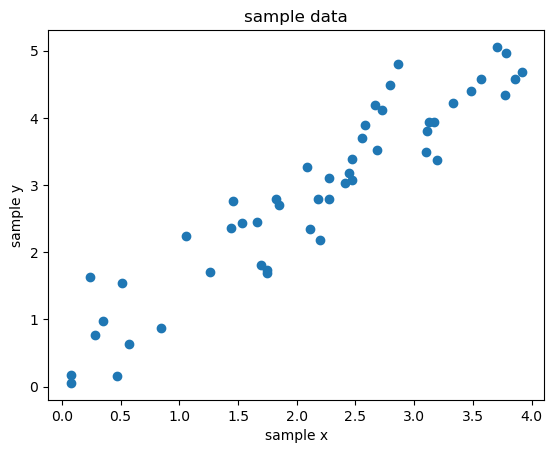

In [4]:
# Load numpy dataset from lab2_task1_sample1.npz
# Hint: use np.load()
loaded_sample1 = np.load("lab2_task1_sample1.npz")

# Create train and test datasets
# Data was saved in a dictionary-liked form, where the keys are ('arr_0','arr_1')
# Load the values into correct variables according to the following mapping.
# (X1 <-- arr_0, Y1 <-- arr_1)
X1 = loaded_sample1['arr_0']
Y1 = loaded_sample1['arr_1']

# Show samples as a scatter plot
plt.scatter(X1, Y1)
plt.xlabel("sample x")
plt.ylabel("sample y")
plt.title("sample data")
plt.show()

**(b) Now find parameters of the regression line with the given samples and your linear regression function.**

In [5]:
## Find the slope and intercept of the regression line using your linear regression function
w1, b1 = linear_regression(X1, Y1)
print("w = {:.2f} b = {:.2f}".format(w1, b1))

w = 1.16 b = 0.40


To test the correctness of your implementation, the values you get should be close to
$w=1.16$, $b=0.40$.

**(c) Use your experience with numpy and matplotlib from the previous lab to visualise the regression line in the range $x \in [0, 4]$.** </br>
In detail, we ask you to:
- Visualise the regression line as a **line plot in <font color='red'>red</font> colour**.
- Visualise the samples as a **scatter plot in <font color='blue'>blue</font> colour**.

Please plot both into the same figure! </br>
Use **50 data points** on the line to make it smooth, and make sure to add an appropriate **plot title** and to **label the axes**!</br>

_Hint_: Check the matplotlib document for details how to do this. You can find many examples there for a variety of different applications. (Check the lab instructions .pdf to see an example of what is expected here.)

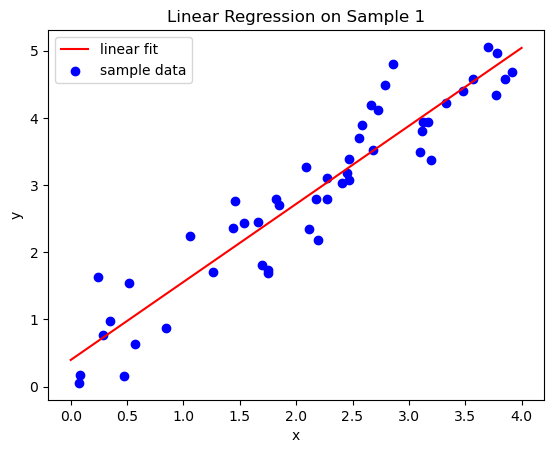

In [6]:
## Viuslise the regression line with given samples (both on the same plot)
X_fit = np.linspace(0, 4, 50)
Y_fit = w1*X_fit + b1

plt.plot(X_fit, Y_fit, color="red", linestyle="-",label="linear fit")
plt.scatter(X1, Y1, color="blue", label="sample data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression on Sample 1")
plt.savefig("linreg1.png")
plt.show()


**(d) Now let's try it on a different set of samples. Load the new samples and visualise them.**

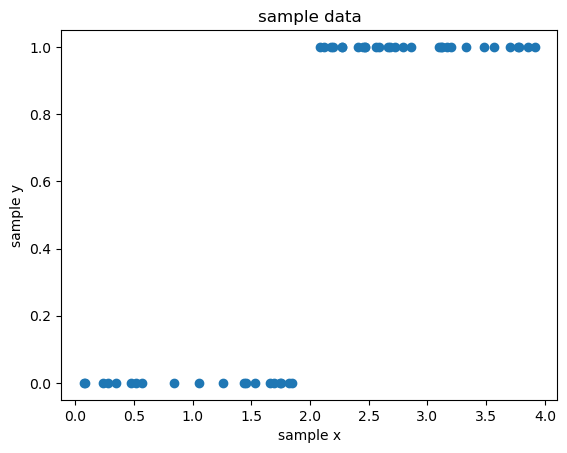

In [7]:
# Load numpy dataset from lab2_task1_sample2.npz
# Hit: use np.load()
loaded_sample2 = np.load("lab2_task1_sample2.npz")

# Create train and test datasets
# Data was saved in a dictionary-liked form, where the keys are ('arr_0','arr_1')
# Load the values into correct variables according to the following mapping.
# (X2 <-- arr_0, Y2 <-- arr_1)
X2 = loaded_sample2['arr_0']
Y2 = loaded_sample2['arr_1']

# Show samples as a scatter plot
plt.scatter(X2, Y2)
plt.xlabel("sample x")
plt.ylabel("sample y")
plt.title("sample data")
plt.show()

**(e) Use your linear regression function to fit a regression line for the new samples (X2, Y2). And visualise the result.**

In detail, we ask you to:
- Visualise the new regression line as a **line plot in <font color='red'>red</font> colour**.
- Visualise the new samples as a **scatter plot in <font color='blue'>blue</font> colour**.

Please plot both into the same figure! </br>

Use **50 data points** to get a smooth line, and make sure to add an appropriate **plot title** and to **label the axes**!

In [27]:
## Find the slope and intercept of the regression line using your linear regression function
w2, b2 = linear_regression(X2, Y2)
print("w = {:.2f} b = {:.2f}".format(w2, b2))


w = 0.38 b = -0.21


To test the correctness of your implementation, the values you get should be close to
$w=0.38$, $b=-0.21$.

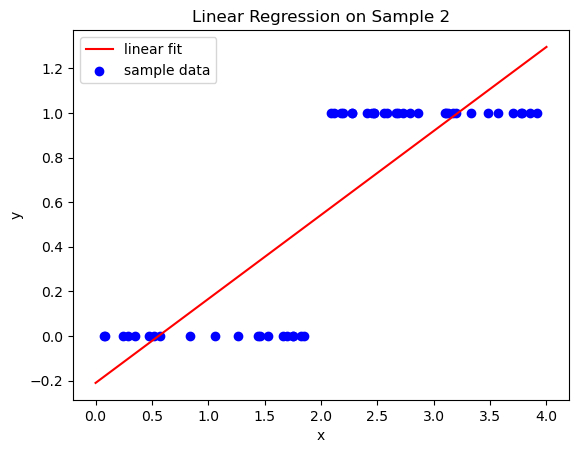

In [9]:
## Viuslise the regression line with given samples (both on the same plot)
X2_fit = np.linspace(0, 4, 50)
Y2_fit = w2*X_fit + b2

plt.plot(X2_fit, Y2_fit, color="red", linestyle="-",label="linear fit")
plt.scatter(X2, Y2, color="blue", label="sample data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression on Sample 2")
plt.savefig("linreg2.png")
plt.show()

<div class="alert alert-block alert-success">

### Discussion

Questions: 

1. Does linear regression give a good fit for the new samples (X2, Y2)? Why or why not?
    
2. What's the difference between two sets of samples (Sample 1 and Sample 2)?

### Answer
    
1. No it doesn't. That's because the linear fit is incapable of capturing the step feature of the data.
    
2. The main difference is that sample 1 has a linear correlation, but sample 2 has a step feature. In other words, sample 1 is linear and sample 2 is non linear.

<div class="alert alert-block alert-info">
    
# Task 2 - Logistic Regression and Gradient Descent <a class="anchor" id="logistic-gd"></a>

In this section, you will be writing the first parts of your code that is essential to predict the outcome of a logistic regression problem. </br>
In detail, you are going to

- 2.1 Implement and visualise the **sigmoid function**
- 2.2 Write code to **predict the outcome** of a classification problem using a pre-trained logistic regression model
- 2.3 Train a model via Gradient Descent
- 2.4 Evaluate the trained model

<div class="alert alert-block alert-info">
    
## Learning Objective 

This task aims to equip you with the knowledge and practical skills required to implement logistic regression, understand gradient descent as an optimization technique, and evaluate the performance of their trained logistic regression model on training and test datasets. By the end of this lab task, you will be able to:
1. Implement and visualize the sigmoid function to map regression outputs into a range from 0 to 1, necessary for logistic regression.
2. Use the sigmoid function to predict the class probabilities of a classification problem using logistic regression with a pre-trained model.
3. Write code to perform gradient descent, compute gradients, and the cost of the logistic regression model to train it on given training data.
4. Train their own logistic regression model using gradient descent with a fixed number of iterations.
5. Evaluate the trained logistic regression model on previously unseen test data points.
6. Convert class probabilities to actual predicted labels and calculate the accuracy of the model for both training and test data.

<div class="alert alert-block alert-info">

## 2.1  The sigmoid function <a class="anchor" id="sigmoid"></a>

The '_sigmoid function_' $\sigma$, sometimes also called '_logistic function_', is a mathematical function that shows a characteristic "S"-shaped curve as you've seen during the lecture (hence its name!). We commonly use this function in our logistic regression to map the regression outputs to a range from 0 to 1. </br>

### Computing the sigmoid
In this task, you are now first asked to write a function that computes the output of the sigmoid function $\sigma(\boldsymbol{x})$ for any input value $\boldsymbol{x}$. </br>

_Hint:_ Use the _numpy_ library you have been introduced to in the previous lab to allow easy computation of multi-dimensional input values as well.

In [13]:
# Implement the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    

You will now use your experience with numpy and matplotlib from the previous lab to visualise the output range of our implemented sigmoid function for a 1 dimensional case in the range $x \in [-10, 10]$. </br>
In detail, we ask you to:
- Visualise the outputs of the sigmoid as a **line plot in <font color='blue'>blue</font> colour**.
- Visualise the outputs of the sigmoid as a **scatter plot in <font color='red'>red</font> colour**.

Please plot both into the same figure! </br>
Use **50 data points** to get a smooth plot, and make sure to add an appropriate **plot title** and to **label the axes**!</br>

_Hint_: Check the matplotlib docu for details how to do this. You can find many examples there for a variety of different applications. (Check the lab instructions .pdf to see an example of what is expected here.)

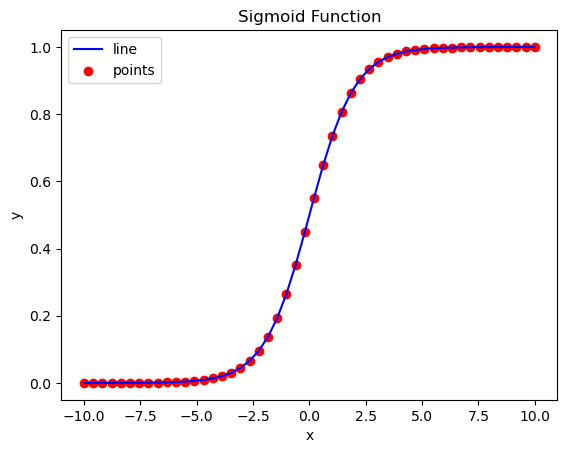

In [14]:
## Visualise the output of the sigmoid function in a range from -10 to 10

X_vis = np.linspace(-10, 10, 50)
Y_vis = sigmoid(X_vis)

plt.plot(X_vis, Y_vis, color="blue", linestyle="-",label="line")
plt.scatter(X_vis, Y_vis, color="red", label="points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Sigmoid Function")
plt.savefig("sig.png")
plt.show()

<div class="alert alert-block alert-success">

### Discussion

1. What is the difference between the line plot and the scatter plot?
2. What would happen if you only used a small number of datapoints to plot?

### Answer
1. The line plot linearly interpolates between the points making the graph look connected, and the scatter plot just plots the individual points.
2. A small number of points will make the plot appear jagged.

<div class="alert alert-block alert-info">

## 2.2 Predicting class probabilities via logistic regression <a class="anchor" id="predict"></a>

You will now use your implemented sigmoid function to solve an actual classification problem using logistic regression. </br>
As discussed in the lecture, a prediction $\hat{y}$ can be obtained by using our logistic regression model via $\hat{y}=\sigma(\boldsymbol{w}^\top \boldsymbol{x})$

Note that for this example, we want to be able to use many samples at the same time - all of which are stored in one single vector $X$, which is similar to the test case $\boldsymbol{x_3}$ from before.

Also note that we predict the distribution over the classes, _i.e._ the probablity for each class -> to get the 'hard' class label, we will later on assign everything below the probablity of 0.5 to class1 and any probability above to class2 (boundary could be included in either).

### Loading the dataset

In [15]:
# Read in the lab2_task2_data.npz using numpy --> data has been saved via np.savez (check docu for more details)

# Components can be accessed like a dictionary after the file has been loaded, and the file contains the following:
# 'X_train' : training data we're going to use
# 'y_train' : labels for the training data
# 'X_test'  : test data we're going to use for evaluation, but NOT for training
# 'y_test'  : labels for the test data
# 'w_pret'  : a set of pretrained weights for the logistic regression model

loaded_data = np.load("lab2_task2_data.npz")
X_train = loaded_data['X_train']
y_train = loaded_data['y_train']
X_test = loaded_data['X_test']
y_test = loaded_data['y_test']
w_pret = loaded_data['w_pret']

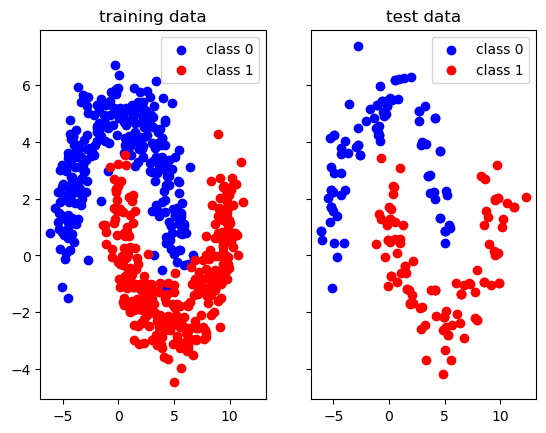

In [16]:
# Add side by side plots here to visualise your train and test data (Use subplots).
# These are the two classes that you will be classifying.
c0_train_ind = np.where(y_train.flatten() == 0)
c0_train = X_train[c0_train_ind]
c1_train_ind = np.where(y_train.flatten() == 1)
c1_train = X_train[c1_train_ind]

c0_test_ind = np.where(y_test.flatten() == 0)
c0_test = X_test[c0_test_ind]
c1_test_ind = np.where(y_test.flatten() == 1)
c1_test = X_test[c1_test_ind]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(c0_train[:,0], c0_train[:,1], color='b', label="class 0")
ax1.scatter(c1_train[:,0], c1_train[:,1], color='r', label="class 1")
ax2.scatter(c0_test[:,0], c0_test[:,1], color='b', label="class 0")
ax2.scatter(c1_test[:,0], c1_test[:,1], color='r', label="class 1")
ax1.title.set_text("training data")
ax2.title.set_text("test data")
ax1.legend()
ax2.legend()
plt.savefig("training and test data")
plt.show()


In [17]:
## Check the shape of the data!
# Note that we assume certain shapes of data for the basic logistic regression formulas to work,
# so make sure you understand which elements should be multiplied with each other!
# Hint: In case the data is stored in a different shape, you can easily transpose the matrices!

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print(f'w_pret: {w_pret.shape}')

X_train: (600, 2)
y_train: (600, 1)
X_test: (200, 2)
y_test: (200, 1)
w_pret: (2, 1)


### Implement a logistic regression model

You are now going to
- Implement a function to predict outcomes using a logistic regression model (taking in data $\boldsymbol{X}$ and parameters $\boldsymbol{w}$)
- Test your function on the example data provided below

In [18]:
# Write a prediction function -> We predict the output class probability, NOT the class label (no 0,1 rounding)
def predict(X, w):

    # Input argument(s):
    # X - the input data
    # w - the weights from the trained model
    
    # Output:
    # Probability prediction of each data point (y_hat)

    # Reshape X input to have data in the columns [mxn]-->[nxm]
    X = X.T

    # Perform Matrix multiplication between the inputs and the weights
    z = w.T @ X

    # Calling Sigmoid
    y_hat = sigmoid(z)

    return y_hat.T #output y_hat as an mx1 array

Test your prediction function using the following toy data points / samples:
- $\boldsymbol{X}_1 = [[0.5, 0.1]]$
- $\boldsymbol{X}_2 = [ [-0.5, -0.7], [0.4, 0.2] ]$
- $\boldsymbol{X}_3 = [ [-0.3, -0.15], [0.89, -0.02], [-0.35, 0.01], [0.26, -0.64] ]$

Note that our data is stored as [number of samples, dim], so you need to pay attention to possibly required transpose operations to perform the calculations correctly. </br>
We also want the same to be true for our predictions, _i.e._ return them in the shape of [number of samples, 1] to match the input data.

In [19]:
## Define the toy input data
X_1 = np.array([[0.5, 0.1]])
X_2 = np.array([[-0.5, -0.7], [0.4, 0.2]])
X_3 = np.array([[-0.3, -0.15], [0.89, -0.02], [-0.35, 0.01], [0.26, -0.64]])

# print(w_pret.shape)
## Obtain predictions using predict function and pretrained parameters w_pret
y_hat_1 = predict(X_1, w_pret)
y_hat_2 = predict(X_2, w_pret)
y_hat_3 = predict(X_3, w_pret)

print(f'y_hat_1: {y_hat_1}')
print(f'y_hat_2: {y_hat_2}')
print(f'y_hat_3: {y_hat_3}')

y_hat_1: [[0.51370692]]
y_hat_2: [[0.61837619]
 [0.48409849]]
y_hat_3: [[0.51192789]
 [0.56831845]
 [0.47251372]
 [0.65665833]]


**If your predict function works as intended, your results should be close to:** </br>
y_hat_1: &nbsp;[[0.51370692]]</br>
y_hat_2: [[0.61837619]</br>
&emsp;&emsp;&emsp;&emsp; &nbsp;&nbsp;[0.48409849]]</br>
y_hat_3: [[0.51192789]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.56831845]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.47251372]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.65665833]]</br>

<div class="alert alert-block alert-info">

## 2.3 Training a model via Gradient Descent <a class="anchor" id="train"></a>
    
In this task, you will be writing code for the essential components to **train your own logistic model via Gradient Descent** given some training data. </br>
In detail, you are going to
- Implement a function that computes and returns **gradient and cost** of the logistic regression
- Write code to perform the actual **gradient descent algorithm** for a fixed number of iterations and **train your own logistic regression model** given some training data
- **Evaluate your model** on previously unseen test data points


As discussed in more detail during the lecture, we commonly use the so-called _Cross Entropy_ Loss to calculate the cost of our logistic regression problem. This loss function can be defined as </br>
</br>
\begin{equation}
    \mathcal{L}_{\mathrm{CE}}(\boldsymbol{w})= - \frac{1}{m}\sum_{i=1}^{m} \Big\lbrace y_i \log \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) + \left( 1 - y_i \right) \log \Big( 1- \underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) \Big\rbrace
\end{equation}
</br>
In this notation, $\sigma(z) = 1 / (1 + \exp(-z))$ denotes the **sigmoid** function, and $(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\dots,(\boldsymbol{x}_m,y_m)$ with $\boldsymbol{x}_i \in \mathbb{R}^n, y_i \in \lbrace 0, 1\rbrace$ represent the $m$ training samples (with labels $y_i$). </br>
The gradient of the cross entropy loss w.r.t. the weights $\boldsymbol{w}$ can be written as
</br>

\begin{equation}
    \nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}} = \frac{1}{m}\sum_{i=1}^{m} \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i} - y_i \Big) \boldsymbol{x}_i
\end{equation}
</br>

###  Gradient and Cost Computation
In this part, we want to define a function that is able to compute our cross-entropy loss $\mathcal{L}_{\mathrm{CE}}$, as well as the gradient $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ of our loss $\mathcal{L}_{\mathrm{CE}}$ _w.r.t._ the parameters $\boldsymbol{w}$. </br>

As you can see above, all we need to compute the gradient vector is the prediction of the model $\hat{y}$ and the actual labels $y$, as well as the input data points $\boldsymbol{X}$. The loss itself is even more simple and only requires the predictions $\hat{y}$ and true labels $y$.

In [24]:
def compute_loss_and_grad(X, y, y_hat):
    # Inputs:
    #    X - Set of samples (each sample is a row in X),
    #    y - Corresponding ground-truth labels
    #    y_hat - Predicted class probabilities

    # Import smallest number represented to handle log(0) edge case
    eps = 1e-12

    # Compute the mean cross-entropy loss w.r.t. the parameters w (mean as defined in lecture)
    # log(0) might throw error, so handled via small eps
    logarg1 = np.where(y_hat < eps, np.tile([eps], len(y_hat)), y_hat)
    logarg2 = np.where((1 - y_hat) < eps, np.tile([eps], len(y_hat)), 1-y_hat)
    loss = - np.mean(y*np.log(logarg1) + (1-y)*np.log(logarg2))

    # Compute the gradient vector (mean over all samples as defined in lecture)
    m = len(y)
    grad_vec = np.zeros((1,np.shape(X)[1]))
    for i in range(m):
        grad_vec += (y_hat[i] - y[i])*X[i]
    grad_vec /= m
    
    # Return loss and gradient vector
    return loss, grad_vec.transpose()


### Training with Gradient Descent

Gradient descent, sometimes also referred to as _steepest descent_, is a popular first-order iterative optimisation method that has become ubiquitous in the machine and deep learning context. As you have heard in the lecture, the idea is to find the local minimum of a differentiable function by repeatedly taking steps in the opposite direction of the gradient of the function at the current point - i.e. in the direction of its steepest descent.

In this section of the lab, you are going to implement the **Gradient Descent algorithm** as a function that we can use afterwards to train our logistic regression model!

The main parts of the algorithm work as follows:
- Initialise hyperparameters like step-size aka learning rate, and number of iterations
- Randomly initialise the set of parameters $\boldsymbol{w}_{init}$ that shall be optimised
- For a certain number of iterations, do:
    - Obtain the prediction using the current weights $\boldsymbol{w}_i$ and training data $\boldsymbol{X}_{train}$
    - Compute the loss $\mathcal{L}_{\mathrm{CE}}$ and the gradient vector $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ w.r.t. the current parameters $\boldsymbol{w}_i$
    - Update the parameters using the gradient vector and learning rate _lr_
- After all iterations are finished, return the final optimised set of parameters

In addition, we ask you to also:
- Return a list of all losses (one value for each iteration)
- Return a list of all gradient vectors (one vector for each iteration)
- Implement an option via the argument "logging" to switch on printing a string containing the 'iteration' and the 'loss' for each iteration

Note that the initial set of parameters $\boldsymbol{w}_{init}$, the hyperparameters as well as the training data $\boldsymbol{X}_{train}$ and labels $\boldsymbol{y}_{train}$ are passed as input arguments to your function.

In [90]:
## Setting some hyperparameters: (Do not change these settings!)
lr = 0.5         # Learning rate
num_epochs = 20    # Number of iterations

In [91]:
def gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False):
    ## Create empty lists to store the values for loss and gradient vector over all
    #  'num_epochs' iterations of our gradient descent optimisation procedure
    losses = []
    grad_vecs = []

    # Init the parameters
    w = w_init

    ## Implement the actual gradient descent using the previously implemented functions
    for ep in range(num_epochs):
        # Compute prediction using current weights
        preds = predict(X_train, w)
        loss, grad_vec = compute_loss_and_grad(X_train, y_train, preds)
        w = w - lr * grad_vec

        # print(w.shape)
        # print(grad_vec.shape)
        losses.append(loss)
        grad_vecs.append(grad_vec)
        
        if logging:
            print(f'Ep {ep+1:2d} | Loss: {loss:.3f}')

    return w, losses, grad_vecs

In [92]:
# ================================================
# Do not change these settings!
# Set a random seed
np.random.seed(12345)
# ================================================

## Run the function on the training set

## Start from a random initialisation
w_init = np.random.randn(X_train.shape[1],1)

# Obtain the final weights via gradient descent
w_final, _, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train)

<div class="alert alert-block alert-info">

## 2.4 Evaluating the trained model <a class="anchor" id="evaluate"></a>

After you have obtained your optimised set of parameters $\boldsymbol{w}^{*}$, let's see how your model performs! </br>

To this end, you are going to:
- Obtain the predictions (class probabilities) $\hat{y}_{train}$ for the training data $\boldsymbol{X}_{train}$ using $\boldsymbol{w}^{*}$
- Obtain the predictions (class probabilities) $\hat{y}_{test}$ for the test data $\boldsymbol{X}_{test}$ using $\boldsymbol{w}^{*}$
- Convert these into the actual predicted labels (everything with probability >=0.5 is more likely to be of class 1 and thus gets label '1' assigned ; below gets label '0')
- Count how many samples have been correctly classified and compute the percentage (_i.e._, the accuracy in %)
- Report your obtained accuracies for both training and test data

In [93]:
## Evaluate the obtained model on training data and previously unseen test data

# Obtain predicted class probabilities for train and test data
y_hat_train = predict(X_train, w_final)
y_hat_test  = predict(X_test, w_final)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_hat_train = np.where(y_hat_train >=0.5, 1, 0)
c_hat_test = np.where(y_hat_test >= 0.5, 1, 0)

# Evaluate the classification accuracy for training and test data
acc_train = np.mean(np.where(c_hat_train == y_train, 1, 0))
acc_test = np.mean(np.where(c_hat_test == y_test, 1, 0))

# Print outputs
print(f'Training accuracy: {acc_train:.3f} | Test accuracy: {acc_test:.3f}')

Training accuracy: 0.868 | Test accuracy: 0.840


If your implementation work correctly and using the provided hyperparameter settings, you should obtain something around:

Training accuracy: 0.868 | Test accuracy: 0.840

<div class="alert alert-block alert-success">

Answer the following questions:

What's the difference between the linear regression and the logistic regression in term of application?

Answer:
    
linear regression is used for hyperplane fitting that best approximates some linear data distribution, but logistic regression is for binary classification.

<div class="alert alert-block alert-info">

# Task 3 - Analysing convergence and accuracy <a class="anchor" id="analyse-convergence-and-accuracy"></a>
    
In this section, your task involves examining logistic regression models using various hyper-parameter configurations and assessing their convergence behavior.  </br>

## Improving the accuracy <a class="anchor" id="improve-accuracy"></a>
Our previous choice of hyperparameters might not be the best possible one (or even close to it). </br>
Can you achieve a **better test accuracy** by changing the hyperparameters from the previous task? </br>
Try to improve upon the standard choice by varying the learning rate `lr`. At the meantime, we are going to take a closer look at how gradient descent 'progresses' for different choices of learning rate. Report your choice and best results below!

Given the provided set of learning rates _lrs_, run your implemented gradient descent method and plot the obtained loss values over the number of iterations for each learning rate.  </br>
Additionally save the training and test accuracies achieved for each learning rate. </br>
You can re-use/copy-and-paste your code from above, or define it as a function!

<div class="alert alert-block alert-info">
    
## Learning Objective 
The aim of this task is to enhance learners' ability to fine-tune hyperparameters for logistic regression models, interpret convergence trends, and make informed decisions about model accuracy and potential overfitting on the dataset. By the end of this lab task, the you will be able to:
1. Analyze and compare the test accuracy of the logistic regression model with different hyperparameter settings.
2. Evaluate the training convergence of the logistic regression model during the training process and identify any general trends in the convergence behavior.
3. Assess whether the model shows signs of overfitting on the given dataset by analyzing the training vs. test accuracy.
4. Describe their observations regarding the relationship between the choice of learning rates, convergence results, and accuracy on the training and test data.

In [94]:
## Provided list of learning rates to train on:
lrs = [0.05, 0.1, 1.0, 5.0]
# Max number of iterations for GD algorithm to run
num_epochs = 20

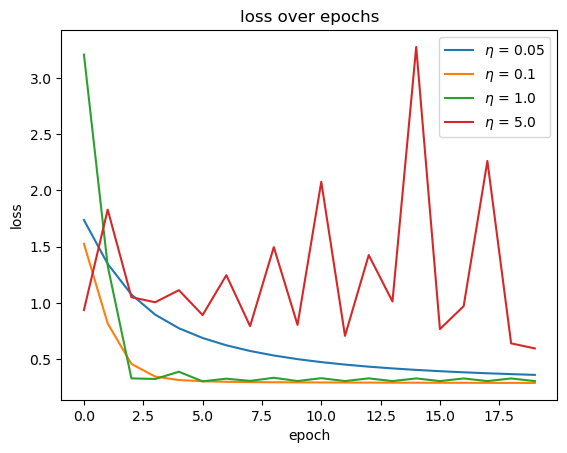

In [102]:
# ================================================
# Do not change these settings!
# Set a random seed
np.random.seed(12345)
# ================================================

## Run gradient descent for all learning rates, and plot results
fig = plt.subplots()
x_vals = range(num_epochs)
w_finals = {}

for lr in lrs:
    ## Start from a random initialisation
    w_init = np.random.randn(X_train.shape[1],1)

    # Obtain the final weights via gradient descent
    w_final, losses, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train)
    plt.plot(x_vals, losses, label=f"$\eta$ = {lr}")
    w_finals[f'lr={lr}'] = w_final

# Add legend, title and label the axes
plt.legend()
plt.title("loss over epochs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [103]:
# Evaluating the stored parameter sets to retrieve train and test accuracies
def evaluate(X,y,w):
    # Obtain predicted class probabilities
    y_hat = predict(X, w)

    # Obtain actual class labels (everything >=0.5 is class1, rest class0)
    c_hat = np.where(y_hat >=0.5, 1, 0)

    # Evaluate the classification accuracy for training and test data
    acc = np.mean(np.where(c_hat == y, 1, 0))
    
    return acc

print(' >>> Training accuracies for different learning rates: <<<')
for k,v in w_finals.items():
    print(f'{k}: \t {round(evaluate(X_train, y_train, v),3)}')

print('\n >>> Test accuracies for different learning rates: <<<')
for k,v in w_finals.items():
    print(f'{k}: \t {round(evaluate(X_test, y_test, v), 3)}')

 >>> Training accuracies for different learning rates: <<<
lr=0.05: 	 0.845
lr=0.1: 	 0.868
lr=1.0: 	 0.848
lr=5.0: 	 0.783

 >>> Test accuracies for different learning rates: <<<
lr=0.05: 	 0.835
lr=0.1: 	 0.85
lr=1.0: 	 0.84
lr=5.0: 	 0.77


<div class="alert alert-block alert-success">

### Describe & Explain

Answer the following questions and elaborate on your observations:

1 What do you observe? Are there general trends in convergence visible, and are they ‘good’ or ‘bad’?

2 What do you think would be the best choice from the set of provided learning rates, and why?

### Answer

1 The learning rate of 5 causes divergence. The learning rate of 1 shows small oscillation. The learning rate of 0.1 and 0.05 both converge nicely.
    
2 The best choice is the learning rate of 0.1, because the loss monotonically decreases in a nice manner and converges the fastest. 

<div class="alert alert-block alert-danger">

# <p style="text-align: center;">The End</p>